In [144]:
import dlib
import cv2
import os
import glob
import matplotlib.pyplot as plt
from imutils import face_utils
import imutils
import numpy as np
import time

%matplotlib inline

In [145]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

In [176]:
def crop(file, paddingRatio = 0.3, size=(256,256)) :
    image = cv2.imread(file)
#     (h, w, _) = image.shape
#     resize = (256, int(round(h * 256 / w)))
#     image = cv2.resize(image, resize, interpolation = cv2.INTER_CUBIC)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    (image_height, image_width) = gray.shape
    # print("image_width : ", image_width)
    # print("image_height : ", image_height)

    for (i, rect) in enumerate(rects):
    #     shape = predictor(image, rect)
    #     shape = face_utils.shape_to_np(shape)
        (detect_x, detect_y, detect_w, detect_h) = face_utils.rect_to_bb(rect)

    #     print("detect_x : ", detect_x)
    #     print("detect_y : ", detect_y)
    #     print("detect_w : ", detect_w)
    #     print("detect_h : ", detect_h)

        padding = int(round(detect_h * paddingRatio))
    #     print("padding : ",padding)

        overflow_x0 = detect_x - padding
        overflow_x1 = image_width - (detect_x + detect_w + padding)
        overflow_y0 = detect_y - padding
        overflow_y1 = image_height - (detect_y + detect_h + padding)

    #     print("overflow_x0 : ", overflow_x0)
    #     print("overflow_x1 : ", overflow_x1)
    #     print("overflow_y0 : ", overflow_y0)
    #     print("overflow_y1 : ", overflow_y1)

        x_padding = padding
        y_padding = padding

        if overflow_x0 < 0 or overflow_x1 < 0 :
            if overflow_x0 < overflow_x1 :
                x_padding = overflow_x0 + padding
            else :
                x_padding = overflow_x1 + padding

        if overflow_y0 < 0 or overflow_y1 < 0 :
            if overflow_y0 < overflow_y1 :
                y_padding = overflow_y0 + padding
            else :
                y_padding = overflow_y1 + padding

        if x_padding < y_padding :
            padding = x_padding
        else :
            padding = y_padding

    #     print("padding : ",padding)
        x0 = detect_x - padding
        x1 = detect_x + detect_w + padding
        y0 = detect_y - padding
        y1 = detect_y + detect_h + padding

    #     cv2.circle(image, (x0, y0), 1, (0, 0, 255), -1)
    #     cv2.circle(image, (x1, y0), 1, (0, 0, 255), -1)
    #     cv2.circle(image, (x0, y1), 1, (0, 0, 255), -1)
    #     cv2.circle(image, (y1, y1), 1, (0, 0, 255), -1)
        sub_face = image[y0:y1, x0:x1]
        resize_face = cv2.resize(sub_face, size, interpolation = cv2.INTER_CUBIC)
        return resize_face

In [166]:
image = cv2.imread('../../photo/portrait_fail/09201830187.jpeg')
(h, w, _) = image.shape
size = (256, int(round(h * 256 / w)))
image = cv2.resize(image, size, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('../../result/resize_test.jpeg', image)

True

In [170]:
crop_image = crop('../../photo/portrait_fail/09201830187.jpeg')
cv2.imwrite('../../result/corp_test.jpeg', crop_image)

None


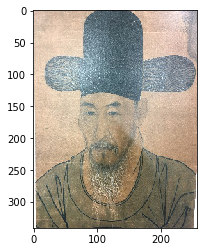

In [168]:
img = cv2.imread('../../result/resize_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [185]:
def pre_process(dirname="../../photo/portrait", image_type=('*.jpg', '*jpeg', '*.png'), size=(256,256)):
    file_list = []
    for files in image_type:
        file_list.extend(glob.glob('./' + dirname + '/' + files))    
    
#     #Make directory
#     directory = "faces_resize"
#     if not os.path.exists(directory):
#         os.mkdir(directory)
    length = len(file_list)
    start_time = time.time()
    
    for i in range(len(file_list)):
        crop_image = crop(file_list[i])
        crop_fname = file_list[i].replace(dirname, "../../result/trainB_resize")
        print(("crop : %d/%d, time : %4.4f, name : %s" % (i, length, time.time() - start_time, crop_fname)))
        if crop_image is not None :
            cv2.imwrite(crop_fname, crop_image)

In [175]:
pre_process()

crop : 0/228, time : 0.1134, name : ./../../result/tarinB_resize/092017590535.jpg
crop : 1/228, time : 0.2047, name : ./../../result/tarinB_resize/092017592688.jpg
crop : 2/228, time : 0.2941, name : ./../../result/tarinB_resize/09201759323.jpg
crop : 3/228, time : 0.3899, name : ./../../result/tarinB_resize/092017593341.jpg
crop : 4/228, time : 0.4844, name : ./../../result/tarinB_resize/092017593481.jpg
crop : 5/228, time : 0.5752, name : ./../../result/tarinB_resize/092017593618.jpg
crop : 6/228, time : 0.6811, name : ./../../result/tarinB_resize/092017593753.jpg
crop : 7/228, time : 0.7688, name : ./../../result/tarinB_resize/092017593897.jpg
crop : 8/228, time : 0.8613, name : ./../../result/tarinB_resize/092017594024.jpg
crop : 9/228, time : 0.9495, name : ./../../result/tarinB_resize/092017594151.jpg
crop : 10/228, time : 1.0515, name : ./../../result/tarinB_resize/092017594290.jpg
crop : 11/228, time : 1.1476, name : ./../../result/tarinB_resize/092017594430.jpg
crop : 12/228, 

In [190]:
def detect(file) :
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)
    (image_height, image_width) = gray.shape
    
    for (i, rect) in enumerate(rects):
        return i

def detect_result(dirname="../../result/portrait_fail", image_type=('*.jpg', '*jpeg', '*.png'), size=(256,256)):
    file_list = []
    for files in image_type:
        file_list.extend(glob.glob('./' + dirname + '/' + files))    

#     #Make directory
#     directory = "faces_resize"
#     if not os.path.exists(directory):
#         os.mkdir(directory)
    length = len(file_list)
    start_time = time.time()
    count = 0
    
    for i in range(len(file_list)):
        detect_result = detect(file_list[i])
        print(("detect : %d/%d, time : %4.4f" % (i, length, time.time() - start_time)))
        if detect_result is not None :
            count = count + 1
    print(count)

In [191]:
detect_result()

detect : 0/6, time : 0.0524
detect : 1/6, time : 0.0995
detect : 2/6, time : 0.1447
detect : 3/6, time : 0.1850
detect : 4/6, time : 0.2251
detect : 5/6, time : 0.2668
2


In [192]:
def resize(file, size=256) :
    image = cv2.imread(file)
    (h, w, _) = image.shape
    resize = (size, int(round(h * size / w)))
    image = cv2.resize(image, resize, interpolation = cv2.INTER_CUBIC)
    return image

def resize_dir(dirname="../../photo/portrait_fail", image_type=('*.jpg', '*jpeg', '*.png'), size=256):
    file_list = []
    for files in image_type:
        file_list.extend(glob.glob('./' + dirname + '/' + files))    

    length = len(file_list)
    start_time = time.time()
    
    for i in range(len(file_list)):
        resize_result = resize(file_list[i])
        resize_fname = file_list[i].replace(dirname, "../../result/portrait_resize")
        print(("resize : %d/%d, time : %4.4f" % (i, length, time.time() - start_time)))
        cv2.imwrite(resize_fname, resize_result)


In [193]:
resize_dir()

resize : 0/84, time : 0.0313
resize : 1/84, time : 0.0661
resize : 2/84, time : 0.1056
resize : 3/84, time : 0.1463
resize : 4/84, time : 0.1931
resize : 5/84, time : 0.2220
resize : 6/84, time : 0.7477
resize : 7/84, time : 1.1878
resize : 8/84, time : 1.7249
resize : 9/84, time : 2.2194
resize : 10/84, time : 2.4783
resize : 11/84, time : 2.7506
resize : 12/84, time : 3.0302
resize : 13/84, time : 3.3570
resize : 14/84, time : 3.6207
resize : 15/84, time : 3.9317
resize : 16/84, time : 4.3537
resize : 17/84, time : 4.6903
resize : 18/84, time : 4.9751
resize : 19/84, time : 5.2549
resize : 20/84, time : 5.5472
resize : 21/84, time : 5.8978
resize : 22/84, time : 6.1861
resize : 23/84, time : 6.4500
resize : 24/84, time : 6.7178
resize : 25/84, time : 7.1708
resize : 26/84, time : 7.4810
resize : 27/84, time : 7.7594
resize : 28/84, time : 8.0403
resize : 29/84, time : 8.3568
resize : 30/84, time : 8.7273
resize : 31/84, time : 9.0142
resize : 32/84, time : 9.2997
resize : 33/84, time